# Preamble

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Dataset

In [3]:
pd.read_csv
df = pd.read_csv("dataset-concrete.csv")

# Get a high level overview of the data

In [4]:
m, n = df.shape
columns = df.columns

In [5]:
print("There are", m, "entries.")
print("There are", n - 1, "features")
print
for x in columns:
    print(x)

There are 1030 entries.
There are 8 features
Cement
Slag
FlyAsh
Water
Superplasticizer
CoarseAggregate
FineAggregate
Age
Strength


In [6]:
df.dtypes

Cement              float64
Slag                float64
FlyAsh              float64
Water                object
Superplasticizer    float64
CoarseAggregate     float64
FineAggregate       float64
Age                   int64
Strength             object
dtype: object

# Remove examples with missing depentant variable.

In [7]:
df.Strength.unique()

array(['79.99', '61.89', '40.27', '41.05', '44.3', '47.03', '43.7',
       '36.45', 'UNK', '39.29', '38.07', '28.02', '43.01', '42.33',
       '52.91', '39.36', '56.14', '40.56', '42.62', '41.84', '28.24',
       '8.06', '52.52', '53.3', '41.15', '52.12', '37.43', '38.6', '55.26',
       '41.72', '42.13', '53.69', '38.41', '30.08', '37.72', '42.23',
       '36.25', '50.46', '39', '53.1', '41.54', '35.08', '15.05', '40.76',
       '26.26', '32.82', '39.78', '46.93', '33.12', '14.59', '14.64',
       '41.93', '9.13', '50.95', '33.02', '54.38', '51.73', '9.87',
       '50.66', '48.7', '55.06', '44.7', '30.28', '40.86', '71.99', '34.4',
       '28.8', '33.4', '36.3', '29', '37.8', '40.2', '28.1', '41.3',
       '25.2', '41.1', '35.3', '28.3', '28.6', '24.4', '39.3', '40.6',
       '24.1', '46.2', '42.8', '49.2', '46.8', '55.6', '54.9', '34.9',
       '46.9', '54.1', '55.9', '49.8', '47.1', '38', '56.1', '59.09',
       '22.9', '35.1', '61.09', '59.8', '60.29', '61.8', '56.7', '68.3',
     

I removed the examples from the dataset that had the dependant variable missing.

In [8]:
df['Strength'].replace('UNK', np.nan, inplace=True)
df.dropna(subset = ['Strength'], inplace=True)
df['Strength'] = df['Strength'].astype(float)

# Domain Expert

I contacted 6 Civil Engineers to advise me on data preperation and feature engineering. They all told me the exact same thing. The most import factor in estimating the strength of concrete is the ratio between the Water and the Cement + Slag + FlyAsh and Age.

In [9]:
df.describe()

,Cement,Slag,FlyAsh,Superplasticizer,CoarseAggregate,FineAggregate,Age,Strength
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,281.184683,73.700976,54.452683,6.603707,973.084293,773.637463,45.560000,35.765600
std,104.620721,86.374405,64.040666,9.800483,77.785925,79.876219,63.152984,16.729145
min,102.000000,0.000000,0.000000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.000000,0.000000,0.000000,0.000000,932.000000,733.000000,7.000000,23.690000
50%,272.800000,22.000000,0.000000,6.400000,968.000000,779.700000,28.000000,34.240000
75%,350.000000,143.000000,118.300000,10.200000,1029.400000,824.000000,56.000000,45.940000
max,540.000000,359.400000,200.100000,165.000000,1145.000000,992.600000,365.000000,82.600000


We decieded to remove the examples without values for water as the water cement ratio is so important and the number of examples without water is a small percentage.

In [10]:
df['Water'].replace('UNK', np.nan, inplace=True)
df.dropna(subset = ['Water'], inplace=True)
df['Water'] = df['Water'].astype(float)

In [11]:
df.count()

Cement              1009
Slag                1009
FlyAsh              1009
Water               1009
Superplasticizer    1009
CoarseAggregate     1009
FineAggregate       1009
Age                 1009
Strength            1009
dtype: int64

In [12]:
def plot_against(df, x_column, y_column):
    x = df[x_column].values
    y = df[y_column].values
    
    min_x = df[[x_column]].min()[x_column]
    max_x = df[[x_column]].max()[x_column]
    min_y = df[[y_column]].min()[y_column]
    max_y = df[[y_column]].max()[y_column]
    
    x_10_percent = max_x * .10
    y_10_percent = max_y * .10
    
    fig = plt.figure()
    plt.title(y_column + " VS " + x_column )
    plt.xlabel(x_column)
    plt.xlim(min_x - x_10_percent, max_x + x_10_percent)
    plt.ylabel(y_column)
    plt.ylim(min_y - y_10_percent, max_y + y_10_percent)
    xvals = np.linspace(0, 1800, 2)
    plt.scatter(x, y, color = 'green')
    plt.show()
    
def plot_all_against(df, y_column):
    for x in df:
        if x != y_column:
            plot_against(df, x, y_column)

def plot_all_pairs(df):
    for x in range(len(df.columns)):
        for y in range(x + 1,len(df.columns)):
                plot_against(df,df.columns[x],df.columns[y])

I then plotted all the pair for the domain experts to inspect.

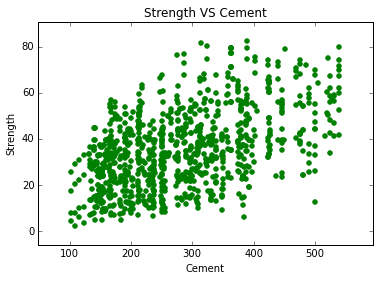

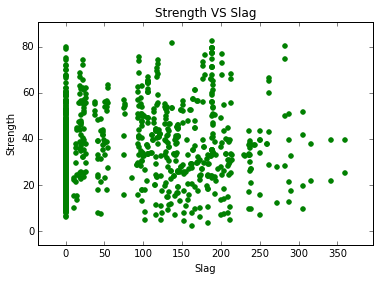

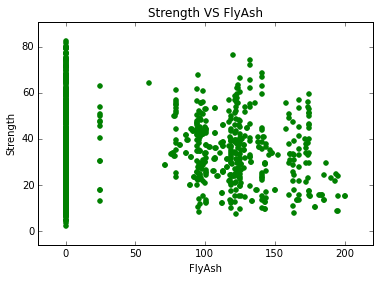

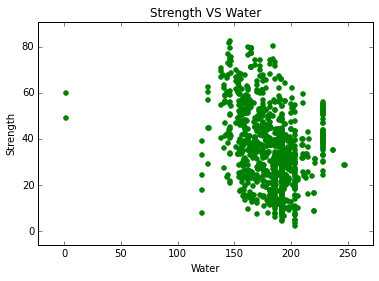

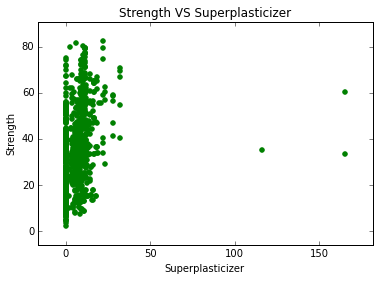

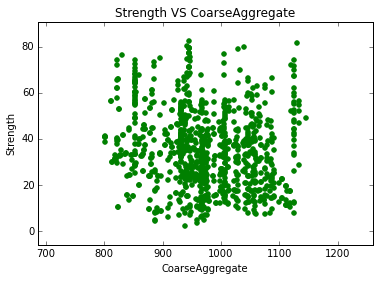

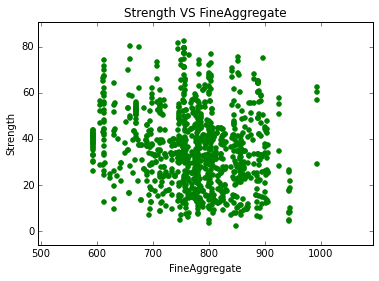

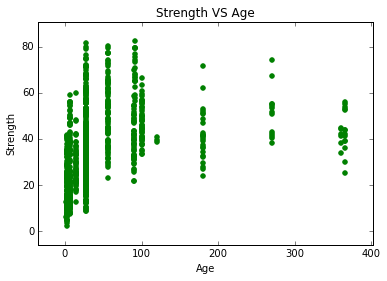

In [13]:
plot_all_against(df, "Strength")

I was inforem that you cannot have cement without water so removed the 2 entries with very low water as they are likely to be bad data. We still have over 1000 examples so I didn't hesitate in removing them.

In [14]:
df = df[df.Water >= 100]

I was then told to remove the two examples with very high superplasticizer. Superplasticizer is expensive and it is unlikely that that much was used. We still have over 1000 examples so I didn't hesitate in removing them.

In [15]:
df = df[df.Superplasticizer <= 50]

In [16]:
df.count()

Cement              1004
Slag                1004
FlyAsh              1004
Water               1004
Superplasticizer    1004
CoarseAggregate     1004
FineAggregate       1004
Age                 1004
Strength            1004
dtype: int64

Still over 1000 example so looking good. Reassign my m and n for use later.

In [17]:
m, n = df.shape

Data is now cleaned and prepared.

# Feature Engineering

Feature Engineering time. With the help of my domain experts we came up with the following Domain-Inspired features. They all told me the exact same thing. The most import factor in estimating the strength of concrete is the ratio between the Water and the Cement + Slag + FlyAsh and Age. We also come up with some other ratios and combinations but this was the most predictive by far. I also threw in some higher order versions of the features to try and improre the linear models. According to my domain experts you should also only compare concrete with the same age to increase predictibility.


In [18]:
cement_values = df['Cement'].values
slag_values = df['Slag'].values
fly_ash_values = df['FlyAsh'].values
coarse_aggregate_values = df['CoarseAggregate'].values
fine_aggregate_values = df['FineAggregate'].values
water_values = df['Water'].values
age_values = df['Age'].values

cements_total = cement_values + slag_values + fly_ash_values
water_cement = (water_values / cements_total)
percent_slag = slag_values / cements_total
percent_fly_ash = fly_ash_values / cements_total
percent_slag_flyash = percent_fly_ash + percent_slag

# Domain Inspired
df['WaterCement'] = water_cement
df['PercentSlag'] = percent_slag
df['PercentFlyAsh'] = percent_fly_ash
df['PercentSlagFly'] = percent_slag_flyash

# Higher Order
df['WaterCementSquared'] = water_cement ** 2
df['PercentSlagSquared'] = percent_slag ** 2
df['PercentFlyAshSquared'] = percent_fly_ash ** 2
df['PercentSlagFlySquared'] = percent_slag_flyash ** 2
df['AgeSquared'] = age_values ** 2

df['WaterCementCubed'] = water_cement ** 3
df['PercentSlagCubed'] = percent_slag ** 3
df['PercentFlyAshCubed'] = percent_fly_ash ** 3
df['PercentSlagFlyCubed'] = percent_slag_flyash ** 3
df['AgeCubed'] = age_values ** 3




In [19]:
df

,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Strength,WaterCement,...,WaterCementSquared,PercentSlagSquared,PercentFlyAshSquared,PercentSlagFlySquared,AgeSquared,WaterCementCubed,PercentSlagCubed,PercentFlyAshCubed,PercentSlagFlyCubed,AgeCubed
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.300000,...,0.090000,0.000000,0.000000,0.000000,784,0.027000,0.000000,0.000000,0.000000,21952
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.300000,...,0.090000,0.000000,0.000000,0.000000,784,0.027000,0.000000,0.000000,0.000000,21952
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.480000,...,0.230400,0.090000,0.000000,0.090000,72900,0.110592,0.027000,0.000000,0.027000,19683000
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.480000,...,0.230400,0.090000,0.000000,0.090000,133225,0.110592,0.027000,0.000000,0.027000,48627125
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.580060,...,0.336470,0.160000,0.000000,0.160000,129600,0.195173,0.064000,0.000000,0.064000,46656000
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03,0.600000,...,0.360000,0.090000,0.000000,0.090000,8100,0.216000,0.027000,0.000000,0.027000,729000
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70,0.480000,...,0.230400,0.040000,0.000000,0.040000,133225,0.110592,0.008000,0.000000,0.008000,48627125
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45,0.480000,...,0.230400,0.040000,0.000000,0.040000,784,0.110592,0.008000,0.000000,0.008000,21952
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29,0.480000,...,0.230400,0.000000,0.000000,0.000000,784,0.110592,0.000000,0.000000,0.000000,21952
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90,38.07,0.580060,...,0.336470,0.160000,0.000000,0.160000,8100,0.195173,0.064000,0.000000,0.064000,729000


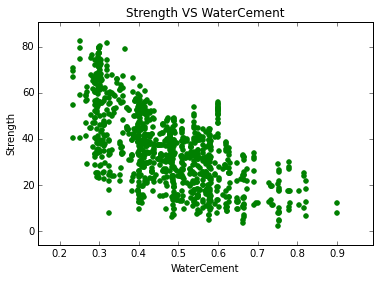

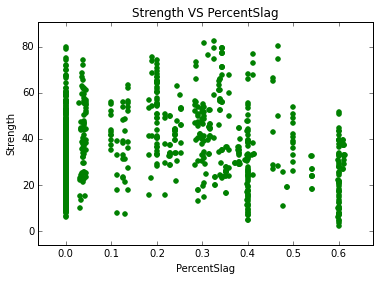

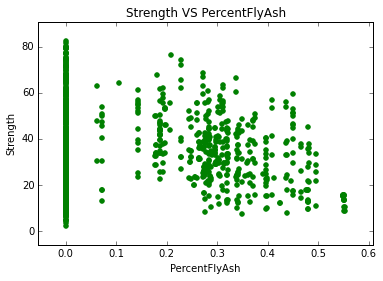

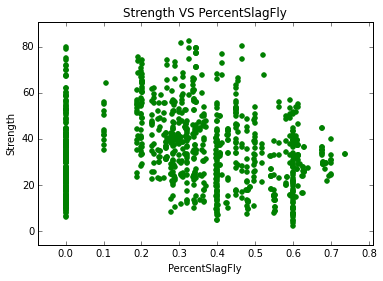

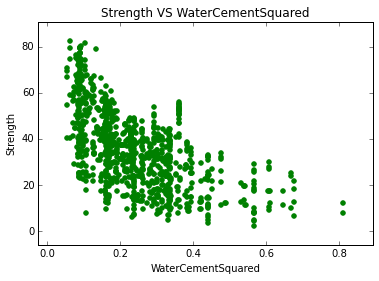

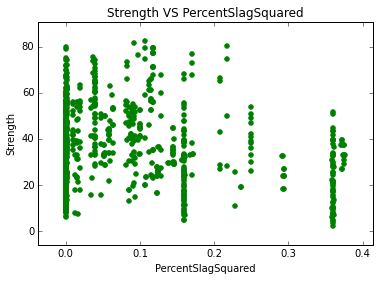

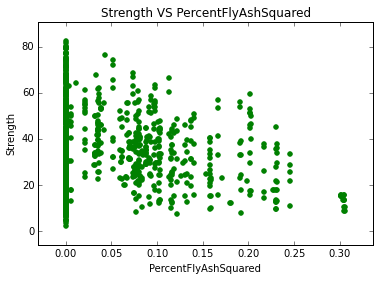

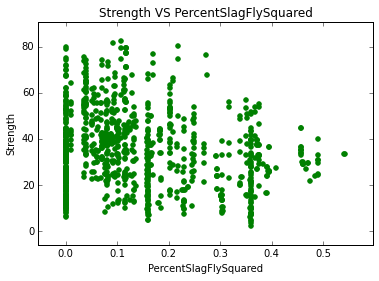

In [20]:
plot_against(df, "WaterCement", "Strength" )
plot_against(df, "PercentSlag", "Strength" )
plot_against(df, "PercentFlyAsh", "Strength" )
plot_against(df, "PercentSlagFly", "Strength" )

plot_against(df, "WaterCementSquared", "Strength" )
plot_against(df, "PercentSlagSquared", "Strength" )
plot_against(df, "PercentFlyAshSquared", "Strength" )
plot_against(df, "PercentSlagFlySquared", "Strength" )

We can see that by far the most predictive feature is the ratio between cement and water.

Lets now plot with same ages

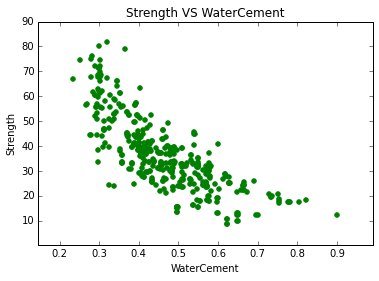

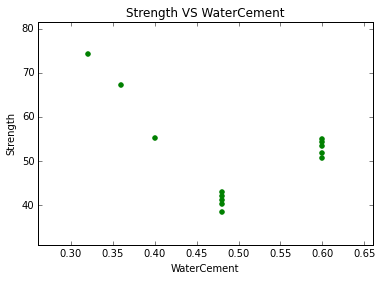

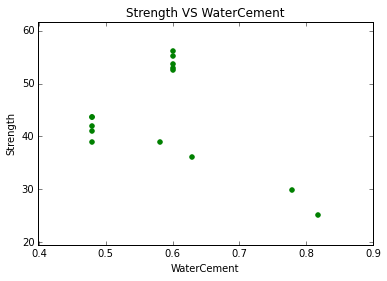

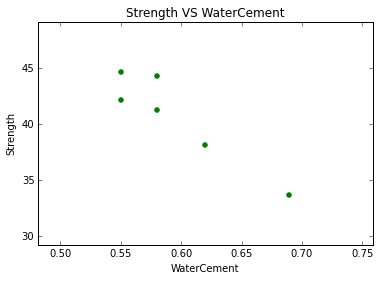

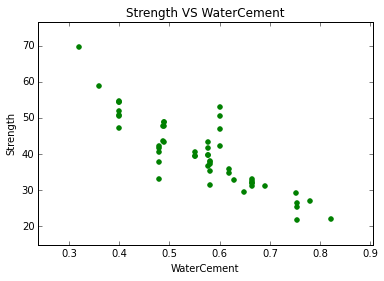

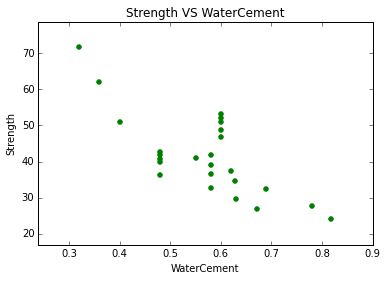

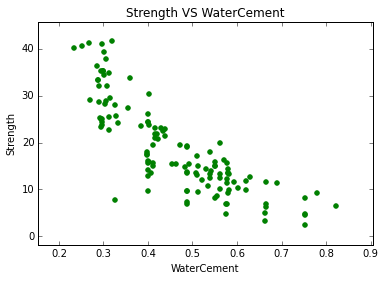

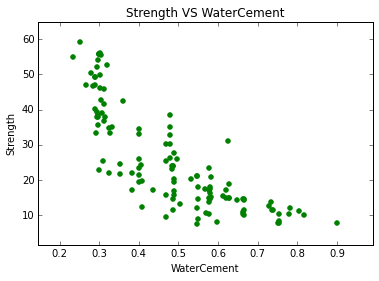

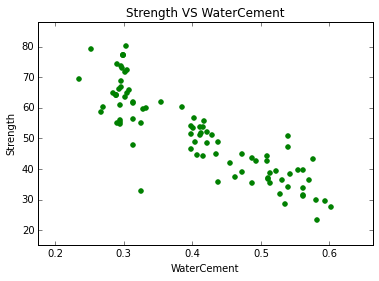

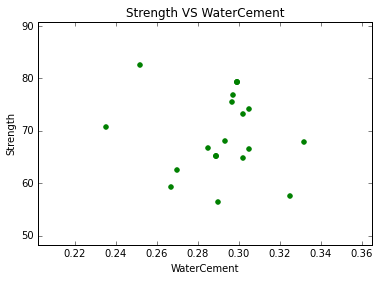

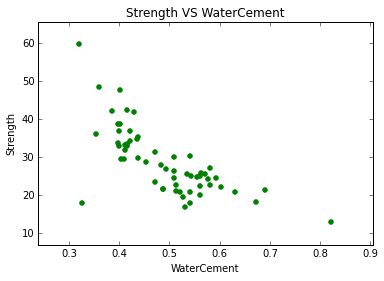

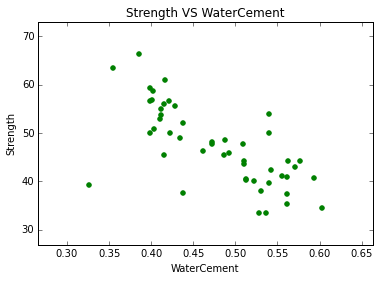

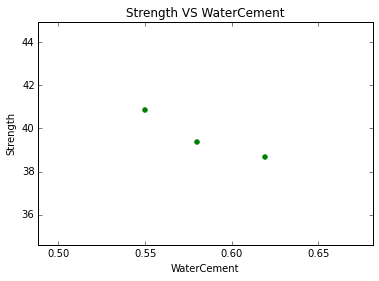

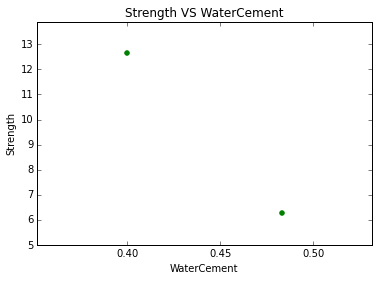

In [21]:

ages = df.Age.unique()
for age in ages:
    age_df = df[df.Age == age]
    plot_against(age_df, "WaterCement", "Strength" )


We can see that there is better patterns when age is use. Ideally I would like to create a custom distance function for knn that compares n neighbours with the same or similar age. I cannot figure out how to do this.

In [22]:
df = df.take(np.random.permutation(m))

X = df[['Cement','Slag','FlyAsh','Water','Superplasticizer','CoarseAggregate','FineAggregate',
        'WaterCement', 'PercentSlag', 'PercentFlyAsh', 'PercentSlagFly', 'Age',
        'WaterCementSquared', 'PercentSlagSquared', 'PercentFlyAshSquared', 'PercentSlagFlySquared', 'AgeSquared',
        'WaterCementCubed', 'PercentSlagCubed', 'PercentFlyAshCubed', 'PercentSlagFlyCubed', 'AgeCubed']]


y = df['Strength']

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFECV

ols = Pipeline([('standardize', StandardScaler()),
                ('feature_selection',  RFECV(LinearRegression())),
                ('estimator', LinearRegression())])

lassocv = Pipeline([('standardize', StandardScaler()),
                ('estimator', LassoCV(cv=10))])

ridgecv = Pipeline([('standardize', StandardScaler()),
                    ('feature_selection', RFECV(RidgeCV(cv=10))),
                    ('estimator', RidgeCV(cv=10))])

def inv_distances(dists):
    return 1 / (0.0001 + dists)

knn = Pipeline([#('standardize', StandardScaler()),
                ('estimator', KNeighborsRegressor(weights = inv_distances))])
knn_hyperparameters = {'estimator__n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [24]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score

ols_mses_test = np.abs(cross_val_score(ols, X, y, scoring = 'mean_squared_error', cv = 10))
ols_mean_mse_test = np.mean(ols_mses_test)

lassocv_mses_test = np.abs(cross_val_score(lassocv, X, y, scoring = 'mean_squared_error', cv = 10))
lassocv_mean_mse_test = np.mean(lassocv_mses_test)

ridgecv_mses_test = np.abs(cross_val_score(ridgecv, X, y, scoring = 'mean_squared_error', cv = 10))
ridgecv_mean_mse_test = np.mean(ridgecv_mses_test)

#Asked domain experts for features for knn as I didn't have time to select them using machine learning.

knn_gs = GridSearchCV(knn, knn_hyperparameters, scoring = 'mean_squared_error', cv = 10) 
knn_mses_test = np.abs(cross_val_score(knn_gs, 
    df[['WaterCement', 'PercentSlag', 'PercentFlyAsh', 'PercentSlagFly', 'Age']],
    y, scoring = 'mean_squared_error', cv = 10))
knn_mean_mse_test = np.mean(knn_mses_test)


print('OLS %4f\nLasso %4f\nRidge %4f\nkNN %4f' % 
    (ols_mean_mse_test, lassocv_mean_mse_test, ridgecv_mean_mse_test, knn_mean_mse_test))

/home/mark/anaconda3/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/mark/anaconda3/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/mark/anaconda3/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/mark/anaconda3/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/mark/anaconda3/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objecti

OLS 54.517704
Lasso 54.293570
Ridge 54.504562
kNN 38.997010


In [25]:
gs = GridSearchCV(knn, knn_hyperparameters, scoring = 'mean_squared_error', cv = 10)
gs.fit(X, y)

best_n = gs.best_params_['estimator__n_neighbors']

In [26]:
final_model = Pipeline([
                ('estimator', KNeighborsRegressor(weights = inv_distances, n_neighbors = best_n))])

final_model.fit(X, y)

Pipeline(steps=[('estimator', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_neighbors=3, p=2,
          weights=<function inv_distances at 0x7fe4994cf950>))])